In [1]:
from data_preprocessing import create_extended_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### GET EXTENDED DATASET, RESEMBLE FIGURE FROM PAPER

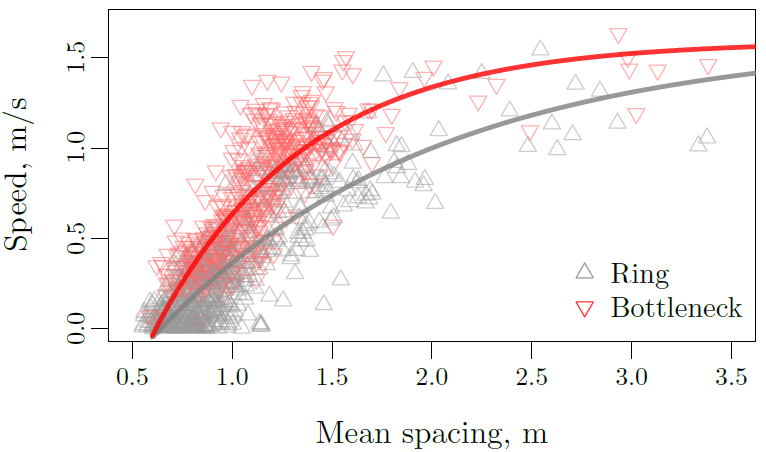

In [6]:
def fd_exec(m_s, v0, T, l):
    return v0 * (1 - np.exp((l - m_s) / (v0 * T)))

In [7]:
path = "../data/dataset_corridor_30.pickle"
dataset = pd.read_pickle(path)
dataset.head()

,OTHERS_POSITIONS,SPEED,MEAN_SPACING
752,"[(0.41591500000000003, -4.09036), (0.561702, -...",0.976187,5.698636
753,"[(0.374857, -4.11633), (0.559227, -3.39821), (...",0.988093,5.69041
754,"[(0.34096200000000004, -4.144769999999999), (0...",1.010181,5.681211
755,"[(0.31285799999999997, -4.17926), (0.543960999...",0.997903,5.674287
756,"[(0.28769500000000003, -4.21406), (0.52741, -3...",0.969367,5.66749


Text(0, 0.5, 'v')

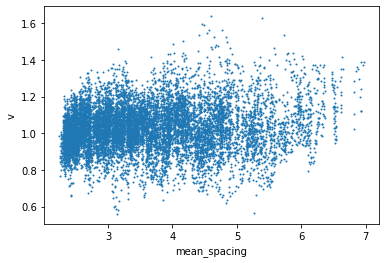

In [8]:
speed_cm = dataset['SPEED'].to_numpy()
mean_spacing_cm = dataset['MEAN_SPACING'].to_numpy()
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
for m_s in mean_spacing_linspace:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
# plt.scatter(mean_spacing_linspace, fd_res, s=1)
# plt.xlim(0,3.5)
plt.xlabel("mean_spacing")
plt.ylabel("v")

In [20]:
corridor_file = "../data/corridor_15_filtered_10-nn_dataframe"
column_names = ['MEAN_SPACING', 'OTHER_POSITIONS', 'SPEED']
corridor_df = pd.read_csv(corridor_file, header=None, sep=" ", names=column_names)
corridor_df.head()
# extended_corridor_df = create_extended_dataframe(corridor_file)
# extended_corridor_df['MEAN_SPACING'] = extended_corridor_df['MEAN_SPACING'].astype(float)

,MEAN_SPACING,OTHER_POSITIONS,SPEED


In [19]:
frame_old, pid_old = corridor_df.iloc[0]['FRAME'], corridor_df.iloc[0]['ID']
for i, r in corridor_df.iloc[1:].iterrows():
    frame, pid = r['FRAME'], r['ID']
    if frame-frame_old != 1 and pid == pid_old:
        print(r)
    frame_old, pid_old = frame, pid

IndexError: single positional indexer is out-of-bounds

Text(0, 0.5, 'v')

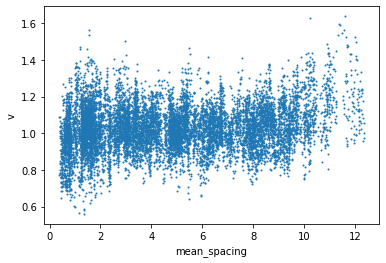

In [16]:
extended_corridor_df = corridor_df
speed_cm = extended_corridor_df['SPEED'].to_numpy()
mean_spacing_cm = extended_corridor_df['MEAN_SPACING'].to_numpy()
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
for m_s in mean_spacing_linspace:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
# plt.scatter(mean_spacing_linspace, fd_res, s=1)
# plt.xlim(0,3.5)
plt.xlabel("mean_spacing")
plt.ylabel("v")

# ATTEMPT WITH WEBSITELOADER

In [8]:
corridor_file = "../data/others_data/website_generated/processed_ug-180-030_combined_MB.txt"
tmpRawdata = np.loadtxt(corridor_file, delimiter=" ", skiprows=1)
d = {}
d['FRAME'] = tmpRawdata[:,0]
d['ID'] = tmpRawdata[:,1]
d['SPEED'] = tmpRawdata[:,2]
d['MEAN_SPACING'] = tmpRawdata[:,3]
d['KNN'] = tmpRawdata[:,4:]

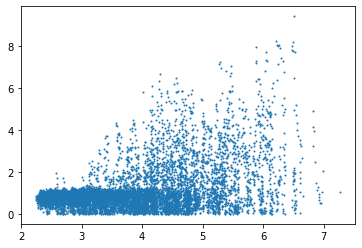

In [9]:
extended_corridor_df = d
speed_cm = extended_corridor_df['SPEED']
mean_spacing_cm = extended_corridor_df['MEAN_SPACING']
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
# mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
# for m_s in mean_spacing_linspace:
#     fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
# plt.scatter(mean_spacing_linspace, fd_res, s=1)
# plt.xlim(0,3.5)

In [5]:
c_f = "../data/processed_ug-180-030.txt"
tmpRawdata = np.loadtxt(c_f, delimiter=" ", skiprows=1)
d = {}
d['FRAME'] = tmpRawdata[:,0]
d['ID'] = tmpRawdata[:,1]
d['SPEED'] = tmpRawdata[:,2]
d['MEAN_SPACING'] = tmpRawdata[:,3]
d['KNN'] = tmpRawdata[:,4:]

(0.0, 3.5)

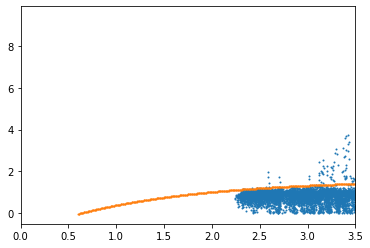

In [7]:
extended_corridor_df = d
speed_cm = extended_corridor_df['SPEED']
mean_spacing_cm = extended_corridor_df['MEAN_SPACING']
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
for m_s in mean_spacing_linspace:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
plt.scatter(mean_spacing_linspace, fd_res, s=1)
plt.xlim(0,3.5)